Please answer the following questions to receive a vacation recommendation:
What type of vacation are you looking for? (relaxation, adventure, culture): culture
Which region of India do you prefer? (north, south, east, west): east
What is your budget range? (low, medium, high): medium
Which outdoor activities do you prefer? (hiking, cycling, water sports, etc.): museum
Which indoor activities do you prefer? (museums, shopping, spa, etc.): shopping
Which historical monuments do you wanna visit? (monument, church, nature_park, temple, etc.): monument
Which modern attractions do you prefer? (shopping, mall, nightlife, etc.): nightlife
Do you prefer the beach or the mountains? (beach, mountain, none): none
How many recommendations would you like? 10
Based on your answers, we recommend the following 1 vacation destinations:
['Kolkata']


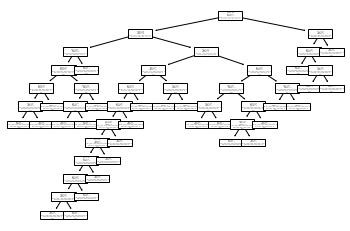

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("indian_tourist_locations.csv")

X = data.drop('destination', axis=1)
y = data['destination']

features = ["type", "region", "budget", "outdoor_activity", "indoor_activity", "historical_attraction", "modern_attraction", "beach", "mountain"]
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[features]).toarray(), columns=encoder.get_feature_names_out(features))

# Concatenate the encoded categorical variables with the numerical variables
X = pd.concat([X_encoded, X.drop(features, axis=1)], axis=1)

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
plot_tree(model)

# Use the model to make a recommendation
print("Please answer the following questions to receive a vacation recommendation:")
answer1 = input("What type of vacation are you looking for? (relaxation, adventure, culture): ")
answer2 = input("Which region of India do you prefer? (north, south, east, west): ")
answer3 = input("What is your budget range? (low, medium, high): ")
# answer4 = input("Do you prefer outdoor or indoor activities? (outdoor, indoor, no preference): ")
# if answer4 == "outdoor":
answer4 = input("Which outdoor activities do you prefer? (hiking, cycling, water sports, etc.): ")
# else:
answer5 = input("Which indoor activities do you prefer? (museums, shopping, spa, etc.): ")
# answer6 = input("Do you prefer historical landmarks or modern attractions? (historical, modern, none): ")
# if answer6 == "historical":
answer6 = input("Which historical monuments do you wanna visit? (monument, church, nature_park, temple, etc.): ")
# else:
answer7 = input("Which modern attractions do you prefer? (shopping, mall, nightlife, etc.): ")
answer8 = input("Do you prefer the beach or the mountains? (beach, mountain, none): ")
num_recommendations = int(input("How many recommendations would you like? "))

user_input = {"type": answer1,
              "region": answer2,
              "budget": answer3,
              "outdoor_activity": answer4,
              "indoor_activity": answer5,
              "historical_attraction": answer6,
              "modern_attraction": answer7,
              "beach": "yes" if answer8 == "beach" else "no",
              "mountain": "yes" if answer8 == "mountain" else "no"}

user_input_df = pd.DataFrame(user_input, index=[0])

# One-hot encode the categorical variables in the user input data
user_input_encoded = pd.DataFrame(encoder.transform(user_input_df[features]).toarray(), columns=encoder.get_feature_names_out(features))

# Concatenate the encoded categorical variables with the numerical variables in the user input data
user_input_processed = pd.concat([user_input_encoded, user_input_df.drop(user_input_df, axis=1)], axis=1)

predictions = model.predict(user_input_processed)

# Print the recommendations
recommendations = data[data["destination"].isin(predictions)]
num_matches = len(recommendations)

if num_matches >= num_recommendations:
    recommendations = recommendations.sample(n=num_recommendations, replace=False)
    print(f"Based on your answers, we recommend the following {num_recommendations} vacation destinations:")
else:
    recommendations = recommendations.sample(n=num_matches, replace=False)
    print(f"Based on your answers, we recommend the following {num_matches} vacation destinations:")

print(recommendations["destination"].tolist())